# Data Modeling


### Libraries Installation 

In [1]:
pip install pandas scikit-learn seaborn  matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mpl_toolkits.mplot3d


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits.mplot3d (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.mplot3d


In [3]:
pip install pandas scikit-learn numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Data Normalization 

In [4]:
import pandas as pd

data = pd.read_csv('newData.csv')

#  'Amount USD' column before normalization
print("Before normalization:")
print(data['Amount USD'])

amount_usd = data['Amount USD']
min_amount_usd = amount_usd.min()
max_amount_usd = amount_usd.max()
data['Amount USD'] = (amount_usd - min_amount_usd) / (max_amount_usd - min_amount_usd)

# Print the 'Amount USD' column after normalization
print("\nAfter normalization:")
print(data['Amount USD'])


Before normalization:
0         -86.460
1         -28.820
2         -14.409
3        -317.000
4         -43.230
           ...   
82629      -5.205
82630    -600.000
82631   -1000.000
82632      -2.466
82633     -26.301
Name: Amount USD, Length: 82634, dtype: float64

After normalization:
0        0.536271
1        0.545326
2        0.547590
3        0.500053
4        0.543062
           ...   
82629    0.549036
82630    0.455593
82631    0.392753
82632    0.549466
82633    0.545722
Name: Amount USD, Length: 82634, dtype: float64


## Scalling Numerical Feature 


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
data = pd.read_csv('newData.csv')

# Select the columns for scaling
columns_to_scale = ['Amount USD']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Print the scaled data
print("Data After Scaling:")
print(data)


Data After Scaling:
      Transaction Date            Card Type Channel  Transaction Type  \
0              1/1/2023  Visa Classic Debit      ATM       Withdrawal   
1              1/1/2023  Visa Classic Debit      ATM       Withdrawal   
2              1/1/2023  Visa Classic Debit      POS         Purchase   
3              1/1/2023  Visa Classic Debit      ATM       Withdrawal   
4              1/1/2023  Visa Classic Debit      ATM       Withdrawal   
...                 ...                 ...      ...              ...   
82629         6/30/2023  Visa Classic Debit      POS         Purchase   
82630         6/30/2023  Visa Classic Debit      ATM       Withdrawal   
82631         6/30/2023  Visa Classic Debit      ATM       Withdrawal   
82632         6/30/2023  Visa Classic Debit      POS         Purchase   
82633         6/30/2023  Visa Classic Debit      POS         Purchase   

      Transaction Type Group  Entry Mode Transaction Status   Outlet ID  \
0           ATM Transactions

## Data Encoding

In [6]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('newData.csv')

# List of columns to include in the new DataFrame
selected_columns = ['Transaction Date ', 'Card Type', 'Channel ', 'Transaction Type',
                    'Transaction Type Group', 'Entry Mode', 'Transaction Status ',
                    'Merchant Country', 'Merchant Activity ', 'Amount USD']

# Create a new DataFrame with the selected columns
selected_data = data[selected_columns]
selected_data['Merchant Activity '] = selected_data['Merchant Activity '].str.replace('other', 'Other', case=False)
selected_data['Transaction Date '] = pd.to_datetime(selected_data['Transaction Date '])
# Print the new DataFrame
print("Selected Data:")
print(selected_data)
 

Selected Data:
      Transaction Date            Card Type Channel  Transaction Type  \
0            2023-01-01  Visa Classic Debit      ATM       Withdrawal   
1            2023-01-01  Visa Classic Debit      ATM       Withdrawal   
2            2023-01-01  Visa Classic Debit      POS         Purchase   
3            2023-01-01  Visa Classic Debit      ATM       Withdrawal   
4            2023-01-01  Visa Classic Debit      ATM       Withdrawal   
...                 ...                 ...      ...              ...   
82629        2023-06-30  Visa Classic Debit      POS         Purchase   
82630        2023-06-30  Visa Classic Debit      ATM       Withdrawal   
82631        2023-06-30  Visa Classic Debit      ATM       Withdrawal   
82632        2023-06-30  Visa Classic Debit      POS         Purchase   
82633        2023-06-30  Visa Classic Debit      POS         Purchase   

      Transaction Type Group  Entry Mode Transaction Status  Merchant Country  \
0           ATM Transaction

C:\Users\pc\AppData\Local\Temp\ipykernel_3176\1191244760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Merchant Activity '] = selected_data['Merchant Activity '].str.replace('other', 'Other', case=False)
C:\Users\pc\AppData\Local\Temp\ipykernel_3176\1191244760.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Transaction Date '] = pd.to_datetime(selected_data['Transaction Date '])


## Normalize the New DataFrame


In [7]:
import pandas as pd

def normalize_column(data, column_name):
    column = data[column_name]
    min_value = column.min()
    max_value = column.max()
    normalized_column = (column - min_value) / (max_value - min_value)
    return normalized_column

normalized_amount_usd = normalize_column(selected_data, 'Amount USD')
selected_data['Amount USD'] = normalized_amount_usd

print("\nAfter normalization:")
print(selected_data['Amount USD'])



After normalization:
0        0.536271
1        0.545326
2        0.547590
3        0.500053
4        0.543062
           ...   
82629    0.549036
82630    0.455593
82631    0.392753
82632    0.549466
82633    0.545722
Name: Amount USD, Length: 82634, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_3176\1528969076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Amount USD'] = normalized_amount_usd


## Apply One-Hot Encoding

In [8]:

import pandas as pd

def preprocess_data(data):
    # List of categorical columns to encode
    categorical_columns = ['Card Type', 'Channel ', 'Transaction Type Group', 'Entry Mode', 'Transaction Status ','Transaction Type','Merchant Activity ']

    # Apply One-Hot Encoding to the categorical columns
    encoded_data = pd.get_dummies(data, columns=categorical_columns)

    # Clean 'Merchant Country' column by mapping to regions
    country_to_region = {
    'egypt': 'Middle East/North Africa',
    'netherlands': 'Europe',
    'visa_ie': 'Europe',
    'united states': 'North America',
    'germany,federal repu': 'Europe',
    'luxembourg': 'Europe',
    'united kingdom': 'Europe',
    'israel': 'Middle East',
    'singapore': 'Asia',
    'jordan': 'Middle East/North Africa',
    'cyprus': 'Europe',
    'france': 'Europe',
    'czech republic': 'Europe',
    'hong kong': 'Asia',
    'qatar': 'Middle East',
    'austria': 'Europe',
    'lebanon': 'Middle East/North Africa',
    'turkey': 'Middle East',
    'united arab emirates': 'Middle East',
    'sweden': 'Europe',
    'switzerland': 'Europe',
    'spain': 'Europe',
    'australia': 'Oceania',
    'malta': 'Europe',
    'pakistan': 'Asia',
    'romania': 'Europe',
    'iraq': 'Middle East',
    'poland': 'Europe',
    'kazakhstan': 'Asia',
    'bulgaria': 'Europe',
    'thailand': 'Asia',
    'india': 'Asia',
    'lithuania': 'Europe',
    'finland': 'Europe',
    'canada': 'North America',
    'saudi arabia': 'Middle East',
    'japan': 'Asia',
    'morocco': 'Middle East/North Africa',
    'hungary': 'Europe',
    'kenya': 'Africa',
    'estonia': 'Europe',
    'rwanda': 'Africa',
    'malaysia': 'Asia',
    'denmark': 'Europe',
    'italy': 'Europe',
    'brazil': 'South America',
    'nigeria': 'Africa',
    'kuwait': 'Middle East',
    'cambodia': 'Asia',
    'moldova, rep. of': 'Europe',
    'gibraltar': 'Europe',
    'slovenia': 'Europe',
    'ukrainian ssr': 'Europe',
    # Add more mappings as needed
    }


    encoded_data['Merchant Country'] = encoded_data['Merchant Country'].str.strip().str.lower()
    encoded_data['Merchant Country'] = encoded_data['Merchant Country'].map(country_to_region)

    # Apply One-Hot Encoding to the 'Merchant Country' column to create region-based columns
    encoded_data = pd.get_dummies(encoded_data, columns=['Merchant Country'], prefix='Region')

    return encoded_data

# Assuming 'selected_data' is your original DataFrame
preprocessed_data = preprocess_data(selected_data)

# Print the preprocessed data
print("Preprocessed Data:")
print(preprocessed_data.head())




Preprocessed Data:
  Transaction Date   Amount USD  Card Type_Visa Classic Debit  \
0        2023-01-01    0.536271                             1   
1        2023-01-01    0.545326                             1   
2        2023-01-01    0.547590                             1   
3        2023-01-01    0.500053                             1   
4        2023-01-01    0.543062                             1   

   Card Type_Visa Platinum Debit  Card Type_Visa Virtual Debit  Channel _ATM  \
0                              0                             0             1   
1                              0                             0             1   
2                              0                             0             0   
3                              0                             0             1   
4                              0                             0             1   

   Channel _E-Commerce  Channel _POS  Transaction Type Group_ATM Transactions  \
0                    0      

# Apply Isolation Forest Algorithm 


In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import numpy as np

# Convert the date column to numeric representation
reference_date = pd.to_datetime('1/1/2000')  # Choose a reference date
preprocessed_data['Transaction Date '] = (pd.to_datetime(preprocessed_data['Transaction Date ']) - reference_date).dt.days

# Drop non-numeric columns
numeric_columns = preprocessed_data.select_dtypes(include=[np.number]).columns
X_train, X_test = train_test_split(preprocessed_data[numeric_columns], test_size=0.2, random_state=42)

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # You can adjust the contamination parameter
model.fit(X_train)

# Predict anomalies on the testing set
predictions = model.predict(X_test)

# Calculate the number of anomalies detected
num_anomalies_detected = np.sum(predictions == -1)

# Calculate the proportion of anomalies in the predictions
proportion_anomalies = num_anomalies_detected / len(predictions)

# Print the results
print("Number of Anomalies Detected:", num_anomalies_detected)
print("Proportion of Anomalies:", proportion_anomalies)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of Anomalies Detected: 813
Proportion of Anomalies: 0.049192230894899255


# 3D Plot Of Feature

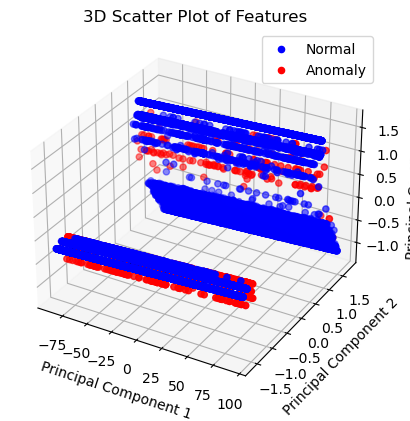

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce dimensions
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(X_test)

# Separate normal and anomaly data
normal_data = X_reduce[predictions == 1]
anomaly_data = X_reduce[predictions == -1]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normal_data[:, 0], normal_data[:, 1], normal_data[:, 2], c='blue', label='Normal')
ax.scatter(anomaly_data[:, 0], anomaly_data[:, 1], anomaly_data[:, 2], c='red', label='Anomaly')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.title('3D Scatter Plot of Features')
plt.show()

# Apply LOF Algorithm

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

# Load your data
data = pd.read_csv('newData.csv')

# Define numerical columns for scaling
numeric_columns = ['Amount USD']

# Perform feature scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)  # You can adjust parameters
anomaly_scores = lof.fit_predict(data[numeric_columns])

# Map LOF results to binary labels (1: normal, -1: anomaly)
true_labels = [1 if score == 1 else -1 for score in anomaly_scores]

# True labels for anomalies (assuming -1 indicates anomaly)
true_anomalies = [label for label in true_labels if label == -1]

# Calculate accuracy and error
accuracy = accuracy_score(true_labels, anomaly_scores)
error_rate = 1 - accuracy

# Print results

print("Number of Detected Anomalies:", len(true_anomalies))


Number of Detected Anomalies: 4128


# DBSCAN # Of Anomalies

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Select data for clustering
X = preprocessed_data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # You can adjust the parameters
labels = dbscan.fit_predict(X_scaled)

# Count the number of anomalies (points labeled as -1)
num_anomalies = np.sum(labels == -1)

print("Number of Anomalies Detected:", num_anomalies)


Number of Anomalies Detected: 2261


## Split The Data & change the EPS value  

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.model_selection import train_test_split

# Select data for clustering
X = preprocessed_data

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply DBSCAN to the training data
dbscan = DBSCAN(eps=1.2, min_samples=5)  # You can adjust the parameters
labels_train = dbscan.fit_predict(X_train_scaled)

# Count the number of anomalies (points labeled as -1)
num_anomalies = np.sum(labels_train == -1)

print("Number of Anomalies Detected in Training Set:", num_anomalies)


Number of Anomalies Detected in Training Set: 463


## Visualize The Anomalies Detected By The DBSCAN 

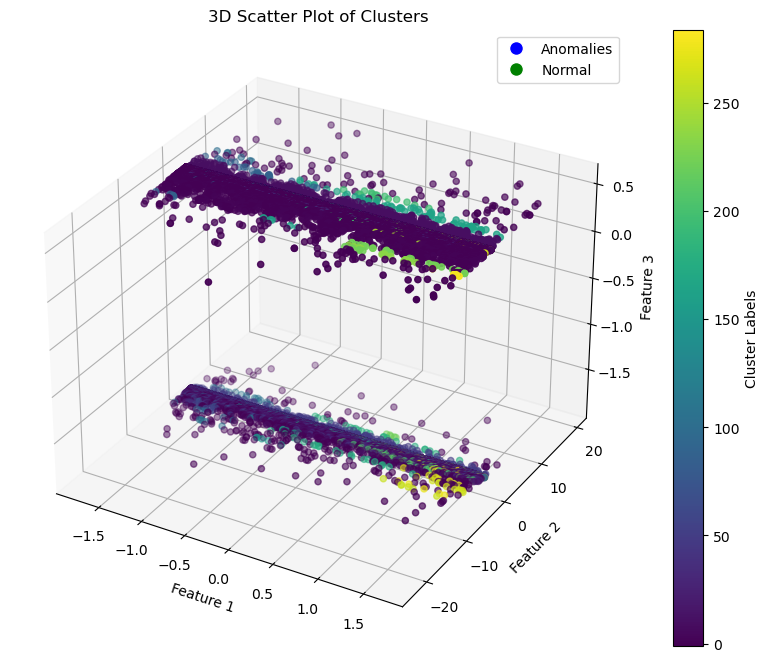

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_scaled contains your scaled data and labels contains the DBSCAN labels
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis')
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Add a legend
legend_labels = np.unique(labels)
legend_handles = []

for label in legend_labels:
    if label == -1:
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Anomalies'))
    elif label == 0:
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Normal'))
 
ax.legend(handles=legend_handles)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Labels')

plt.show()


## DBSCAN  Cluster Distribution

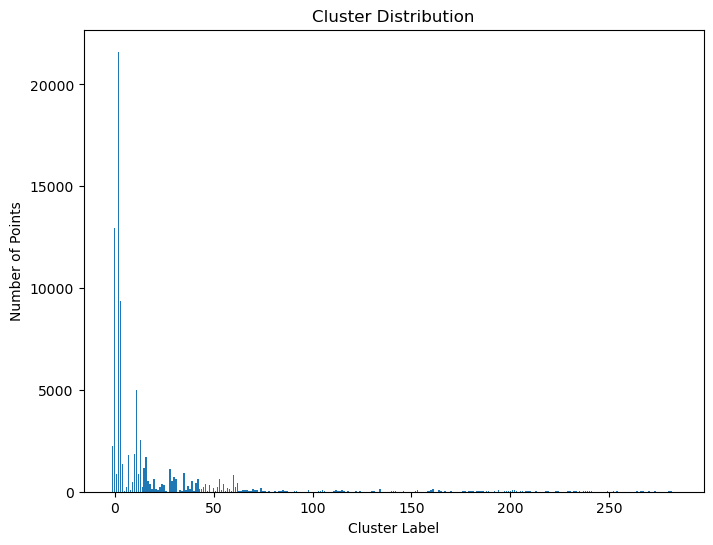

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=np.arange(min(labels), max(labels) + 1) - 0.5, align='mid', rwidth=0.8)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Distribution')
plt.show()


# K-Distance Plot

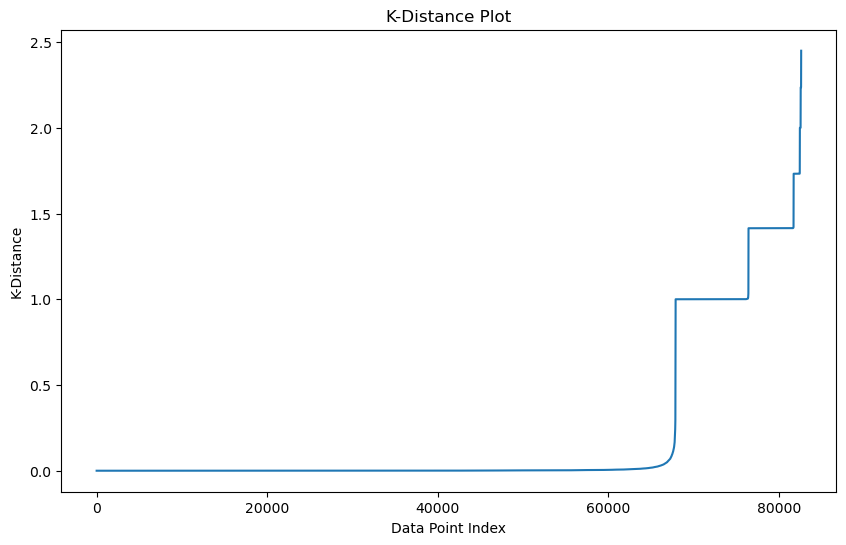

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Select data for clustering
X = preprocessed_data

# Calculate k-distances
min_samples = 5  # Minimum number of samples required to form a dense region
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X)
distances, _ = nn.kneighbors(X)
k_distances = distances[:, -1]  # Distance to the k-th nearest neighbor

# Sort the distances
k_distances_sorted = np.sort(k_distances)

# Plot the K-Distance Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(k_distances_sorted) + 1), k_distances_sorted)
plt.xlabel('Data Point Index')
plt.ylabel('K-Distance')
plt.title('K-Distance Plot')
plt.show()


# NEW LABELED ENCODING

In [18]:
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv("newData.csv", encoding="ISO-8859-1", error_bad_lines=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_3176\1743416578.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("newData.csv", encoding="ISO-8859-1", error_bad_lines=True)


In [19]:
from sklearn.ensemble import IsolationForest
import pandas as pd

contamination = 0.01
data = df.copy()

# Now you can proceed with using the IsolationForest algorithm on your 'data' DataFrame


In [20]:
from sklearn.preprocessing import LabelEncoder


for col in data.columns:
    if data[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))
    else:
        data[col].fillna(-999, inplace=True)


In [21]:
print(data.columns)

Index(['Transaction Date ', 'Card Type', 'Channel ', 'Transaction Type',
       'Transaction Type Group', 'Entry Mode', 'Transaction Status ',
       'Outlet ID', 'Merchant Country', 'Merchant Activity ', 'Client Code',
       'Amount USD'],
      dtype='object')

In [22]:
%%time
model=IsolationForest(contamination=contamination,n_estimators=1000)
model.fit(data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


CPU times: total: 49.8 s
Wall time: 51.9 s


IsolationForest(contamination=0.01, n_estimators=1000)

In [23]:


data["iforest"] = pd.Series(model.predict(data))
data["iforest"] = data["iforest"].map({1: 0, -1: 1})
print(data["iforest"].value_counts())

0    81807
1      827
Name: iforest, dtype: int64
